# 2° Trabalho Prático - Análise Exploratória dos Dados

In [1]:
from datetime import date

data_atual = date.today()
print('\nData entrega do trabalho: 14/03/2021')
print('\nData atual')
print(data_atual)

data_em_texto = '{}/{}/{}'.format(data_atual.day, data_atual.month,
data_atual.year)
print('\nData atual "dd/mm/yyy"')
print(data_em_texto)


Data entrega do trabalho: 14/03/2021

Data atual
2021-03-14

Data atual "dd/mm/yyy"
14/3/2021


### <b>Nome:</b> Marcelo Augusto de Carvalho - <b>164450031</b>

<p>

## Contextualização
O excesso de chuvas traz o atraso na colheita e outros prejuízos à safra de soja e diversos outros tipos de plantações, bem como o excesso de umidade e insolação maior ou menor que o esperado, fazendo com que ocorra perda parcial ou até mesmo total da produção. Além da perda da produção, o excesso pode ocorrer proliferação de pragas, doenças de final de ciclo, colheita tardia ou adiantada.

## Base de Dados
Foram adquiridos os dados da Agência Naconal de Águas (ANA) sobre Chuvas das estações 2043052 (Ouro Branco) no formato de arquivos CSV.
Arquivos: https://drive.google.com/file/d/1BJXXpRRFQnrnL1xpMKslE-6yiSRVHb3-/view?usp=sharing

A base 2043052 fica localizada na base da Serra do Ouro Branco e é gerida pela “Aço Minas”, que iniciou a coleta de dados em maio de 1977 por pluviômetro. A
telemetria foi iniciada em 2006.

## Objetivos
Verificar se houve alteração significativa no regime de chuvas de Ouro Branco desde 1977 e se os dados são confiáveis confiáveis, bem como identificar padrões e 'outliers'.

Para isso, será feito o detalhamento de todos os passos efetuados para a Análise Exploratória:<p>
-Tratamento de valores faltantes<p>
-Identificação de Outliers<p>
-Estatística Descritiva dos Dados<p>
-Técnicas de Feature Engineering utilizadas<p>
-Modelagem dos Dados<p>
-Visualização das principais Variáveis<p><p><p>


Primeiramente, vamos importar as bibliotecas necessárias:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import glob
import matplotlib.dates as mdates
import seaborn as sns


## Lendo arquivos de dados para o Pandas
#### Os arquivos considerados possuem 12 linhas de comentários antes da linha de títulos das colunas. Sendo assim, é necessário fazer o tratamento e modelagem dos dados.

#### Ouro Branco

In [3]:
file = 'chuvas_C_02043052.csv'
s = file.split('C')
s = s[1].split('.')
s = s[0].split('_')
s = s[1]
print('Estação = ', s)
df = pd.read_csv(file,
    sep=';', # separador dos dados ;
    header=0, # linhas de cabeçalho
    skiprows=12, # pula 12 linhas
    thousands=None, # não numero com separador de milhares: 1.000 (mil) ;
    decimal=',') # indica explictamente que o separador de decimais é a vírgula
print(df.head())

Estação =  02043052
         EstacaoCodigo NivelConsistencia  Data  TipoMedicaoChuvas  Maxima  \
2043052              1        01/09/1979     1                NaN     NaN   
2043052              1        01/09/1978     1               35.6    44.3   
2043052              1        01/04/1979     1                NaN     NaN   
2043052              1        01/05/1981     1                NaN     NaN   
2043052              1        01/10/1981     1                NaN     NaN   

         Total  DiaMaxima  NumDiasDeChuva  MaximaStatus  TotalStatus  ...  \
2043052    NaN        NaN               0             0            0  ...   
2043052    1.0        7.0               1             1            1  ...   
2043052    NaN        NaN               0             0            0  ...   
2043052    NaN        NaN               0             0            0  ...   
2043052    NaN        NaN               0             0            0  ...   

         Chuva22Status  Chuva23Status  Chuva24Status  

#### Congonhas

In [4]:
file = 'chuvas_C_02043013.csv'
s = file.split('C')
s = s[1].split('.')
s = s[0].split('_')
s = s[1]
print('\n','-----------------------------------------------------', '\n')
print('Estação = ', s)
df1 = pd.read_csv(file,
sep=';', # separador dos dados ;
header=0, # linhas de cabeçalho
skiprows=12, # pula 12 linhas
thousands=None, # não numero com separador de milhares: 1.000 (mil)
decimal=',') # indica explictamente que o separador de decimais é a vírgula
print(df1.head())


 ----------------------------------------------------- 

Estação =  02043013
         EstacaoCodigo NivelConsistencia  Data  TipoMedicaoChuvas  Maxima  \
2043013              1        01/12/2000     1               75.4   239.6   
2043013              2        01/05/1941     1                NaN     NaN   
2043013              2        01/06/1941     1                0.0     0.0   
2043013              2        01/07/1941     1               15.4    38.6   
2043013              2        01/08/1941     1                9.2     9.2   

         Total  DiaMaxima  NumDiasDeChuva  MaximaStatus  TotalStatus  ...  \
2043013   18.0       22.0               1             1            1  ...   
2043013    NaN        NaN               0             0            0  ...   
2043013    1.0        NaN               1             1            0  ...   
2043013   19.0        9.0               1             1            0  ...   
2043013   18.0        1.0               1             1            0  ... 

#### Os campos ao serem copiados foram movidos para a direita em relação ao título, de forma que os dados da coluna(título) estão exibidos na coluna seguinte. Vamos renomear as colunas.

#### Ouro Branco

In [17]:
campos = ['EstacaoCodigo','NivelConsistencia','Data',
'TipoMedicaoChuvas','Maxima','Total','DiaMaxima', 'NumDiasDeChuva']
bd = df[campos]
novosNomes = ['NivelConsistencia','Data','TipoMedicaoChuvas',
'Maxima','Total','DiaMaxima','sobra1','sobra2']

bd.columns = novosNomes
bd=bd.drop(['sobra1','sobra2', 'TipoMedicaoChuvas',], axis=1)
print(bd.head())
print('\n', '------------------------------------------','\n')

         NivelConsistencia        Data  Maxima  Total  DiaMaxima
2043052                  1  01/09/1979     NaN    NaN        NaN
2043052                  1  01/09/1978    35.6   44.3        1.0
2043052                  1  01/04/1979     NaN    NaN        NaN
2043052                  1  01/05/1981     NaN    NaN        NaN
2043052                  1  01/10/1981     NaN    NaN        NaN

 ------------------------------------------ 



#### Congonhas

In [6]:
bd1 = df1[campos]
bd1.columns = novosNomes
bd1=bd1.drop(['sobra1','sobra2','TipoMedicaoChuvas'], axis=1)
print(bd1.head())

         NivelConsistencia        Data  Maxima  Total  DiaMaxima
2043013                  1  01/12/2000    75.4  239.6       18.0
2043013                  2  01/05/1941     NaN    NaN        NaN
2043013                  2  01/06/1941     0.0    0.0        1.0
2043013                  2  01/07/1941    15.4   38.6       19.0
2043013                  2  01/08/1941     9.2    9.2       18.0


## Excluindo registros com dados ausentes
#### Excluir os NaN

#### Ouro Branco

In [7]:
bd.dropna(axis=0, how='any',inplace=True)
print(bd.head())
print('\n', '------------------------------------------','\n')

         NivelConsistencia        Data  Maxima  Total  DiaMaxima
2043052                  1  01/09/1978    35.6   44.3        1.0
2043052                  1  01/05/1982    19.4   21.6       26.0
2043052                  1  01/05/1983    37.8   63.6       31.0
2043052                  1  01/03/1983    88.4  220.2       20.0
2043052                  1  01/09/1992    38.0  131.2       17.0

 ------------------------------------------ 



#### Congonhas

In [18]:
bd1.dropna(axis=0, how='any',inplace=True)
print(bd1.head())

         NivelConsistencia        Data  Maxima  Total  DiaMaxima
2043013                  1  01/12/2000    75.4  239.6       18.0
2043013                  2  01/06/1941     0.0    0.0        1.0
2043013                  2  01/07/1941    15.4   38.6       19.0
2043013                  2  01/08/1941     9.2    9.2       18.0
2043013                  2  01/09/1941    32.0  117.3       29.0


## A quantidade de dados disponíveis

#### Ouro Branco

In [8]:
print(bd.shape[0])
df.describe()

53


,EstacaoCodigo,Data,TipoMedicaoChuvas,Maxima,Total,DiaMaxima,NumDiasDeChuva,MaximaStatus,TotalStatus,NumDiasDeChuvaStatus,...,Chuva22Status,Chuva23Status,Chuva24Status,Chuva25Status,Chuva26Status,Chuva27Status,Chuva28Status,Chuva29Status,Chuva30Status,Chuva31Status
count,114.0,114.0,53.000000,57.000000,53.000000,48.000000,114.000000,114.000000,114.000000,0.0,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,0.0
mean,1.0,1.0,34.160377,136.149123,16.358491,11.500000,0.464912,0.500000,0.421053,NaN,...,0.105263,0.078947,0.061404,0.052632,0.096491,0.078947,0.114035,0.131579,0.078947,NaN
std,0.0,0.0,25.346630,114.124084,9.381025,6.940476,0.500969,0.502208,0.495908,NaN,...,0.448565,0.270847,0.241129,0.224283,0.548034,0.423737,0.560638,0.572422,0.270847,NaN
min,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.0,1.0,15.800000,30.400000,9.000000,5.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.0,1.0,33.000000,131.200000,19.000000,13.000000,0.000000,0.500000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,1.0,1.0,46.000000,210.300000,24.000000,16.250000,1.000000,1.000000,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.0,1.0,109.800000,496.200000,31.000000,27.000000,1.000000,1.000000,1.000000,NaN,...,4.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,NaN


#### Congonhas

In [23]:
print(bd1.shape[0])
df.describe()

1595


,EstacaoCodigo,Data,TipoMedicaoChuvas,Maxima,Total,DiaMaxima,NumDiasDeChuva,MaximaStatus,TotalStatus,NumDiasDeChuvaStatus,...,Chuva22Status,Chuva23Status,Chuva24Status,Chuva25Status,Chuva26Status,Chuva27Status,Chuva28Status,Chuva29Status,Chuva30Status,Chuva31Status
count,114.0,114.0,53.000000,57.000000,53.000000,48.000000,114.000000,114.000000,114.000000,0.0,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,0.0
mean,1.0,1.0,34.160377,136.149123,16.358491,11.500000,0.464912,0.500000,0.421053,NaN,...,0.105263,0.078947,0.061404,0.052632,0.096491,0.078947,0.114035,0.131579,0.078947,NaN
std,0.0,0.0,25.346630,114.124084,9.381025,6.940476,0.500969,0.502208,0.495908,NaN,...,0.448565,0.270847,0.241129,0.224283,0.548034,0.423737,0.560638,0.572422,0.270847,NaN
min,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.0,1.0,15.800000,30.400000,9.000000,5.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.0,1.0,33.000000,131.200000,19.000000,13.000000,0.000000,0.500000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,1.0,1.0,46.000000,210.300000,24.000000,16.250000,1.000000,1.000000,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.0,1.0,109.800000,496.200000,31.000000,27.000000,1.000000,1.000000,1.000000,NaN,...,4.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,NaN


#### A estação de Congonhas possui 1595 dados, considerando por “intuição” que o regime de chuvas é o mesmo nas duas cidades. Será analisado as duas cidades, porém com um foco mair na estação de Congonhas. Essa discrepância entre as disponibilidades, demonstra um alto grau de comprometimento da CPRM/ANA (empresa pública) e um certo grau de apatia por parte da Açominas (empresa privada) em obter os dados.

#### Os 1595 dados, que são mensais, correspondem a (1595/12) as 133 anos (?estranho). A incoerência será verificada. A coluna ‘NivelConsistencia’ mantem o dado bruto ‘=1’ e o dado consistido ‘=2’. O dado consistido significa que o dado bruto foi avaliado por um especialista para estabelecer a qualidade dos dados.

In [25]:
#Dados consistidos
# Dados brutos
DB = bd1[bd1['NivelConsistencia']==2]
print(DB.head(5))
print('\n \n','Dados consistidos:', DB.shape[0],' equivale a ')
print(DB.shape[0]/12,'anos. [Obs.: De 1941 a 2018 = 77 anos.]','\n')
# Dados brutos
DB1 = bd1[bd1['NivelConsistencia']==1]
#print(bd1.head(),'\n', bd1.shape[0])

         NivelConsistencia        Data  Maxima  Total  DiaMaxima
2043013                  2  01/06/1941     0.0    0.0        1.0
2043013                  2  01/07/1941    15.4   38.6       19.0
2043013                  2  01/08/1941     9.2    9.2       18.0
2043013                  2  01/09/1941    32.0  117.3       29.0
2043013                  2  01/10/1941    22.6  117.3        3.0

 
 Dados consistidos: 710  equivale a 
59.166666666666664 anos. [Obs.: De 1941 a 2018 = 77 anos.] 



#### Houve uma mudança no nome das variáveis que contem a base de dados. De db1 para DB transformando tipo Object em tipo DateTime Para transformar o campo Data no tipo DateTime. usar o campo Data como indexador.

In [26]:
DB['Data'] = pd.to_datetime(DB['Data'], dayfirst=True)
# o index baseado na data
DB = DB.set_index('Data')
#copia o indice para coluna
DB['Data'] = DB.index
# converte para um datetimeindex do tipo dia/mês/ano
DB['Data'] = DB['Data'].dt.strftime('%m/%d/%Y')
print(DB.head())

            NivelConsistencia  Maxima  Total  DiaMaxima        Data
Data                                                               
1941-06-01                  2     0.0    0.0        1.0  06/01/1941
1941-07-01                  2    15.4   38.6       19.0  07/01/1941
1941-08-01                  2     9.2    9.2       18.0  08/01/1941
1941-09-01                  2    32.0  117.3       29.0  09/01/1941
1941-10-01                  2    22.6  117.3        3.0  10/01/1941


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Visualização dos dados

#### Os gráficos abaixo permite verificar que a distribuição da “nuvem de dados” é aleatória (distribuição randômica). Os dados estão distribuidos em uma série temporal, de intervalo mensal.

#### Ouro Branco

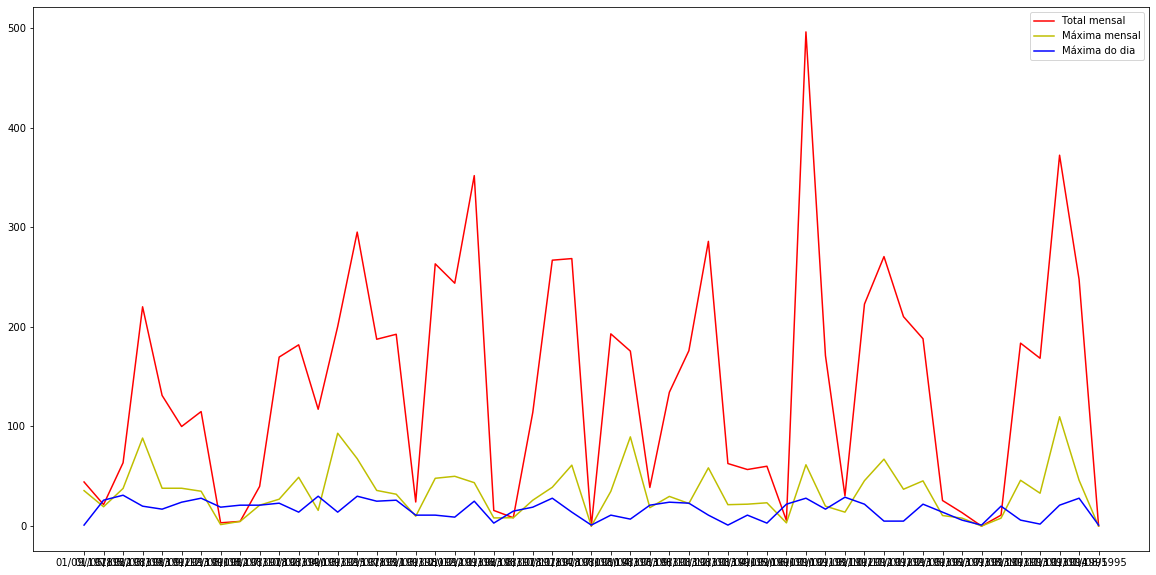

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(bd["Data"], bd["Total"],'r-',bd["Data"], bd["Maxima"],
'y-',bd["Data"], bd["DiaMaxima"],'b-');
plt.legend(['Total mensal','Máxima mensal','Máxima do dia' ])

#### Congonhas

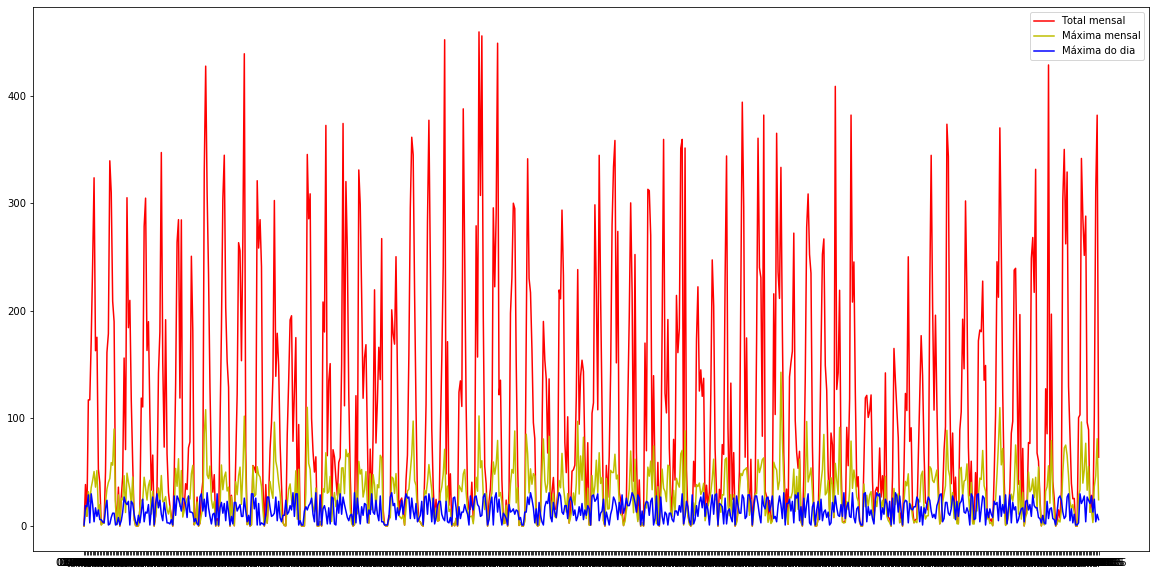

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(DB["Data"], DB["Total"],'r-',DB["Data"], DB["Maxima"],
'y-',DB["Data"], DB["DiaMaxima"],'b-');
plt.legend(['Total mensal','Máxima mensal','Máxima do dia' ])

## Média e distribuição
#### Calculando a média e plotando histograma.

#### Ouro Branco

média =  34.160377358490564


(array([12.,  7.,  7., 11.,  7.,  3.,  2.,  0.,  3.,  1.]),
 array([  0.  ,  10.98,  21.96,  32.94,  43.92,  54.9 ,  65.88,  76.86,
         87.84,  98.82, 109.8 ]),
 <a list of 10 Patch objects>)

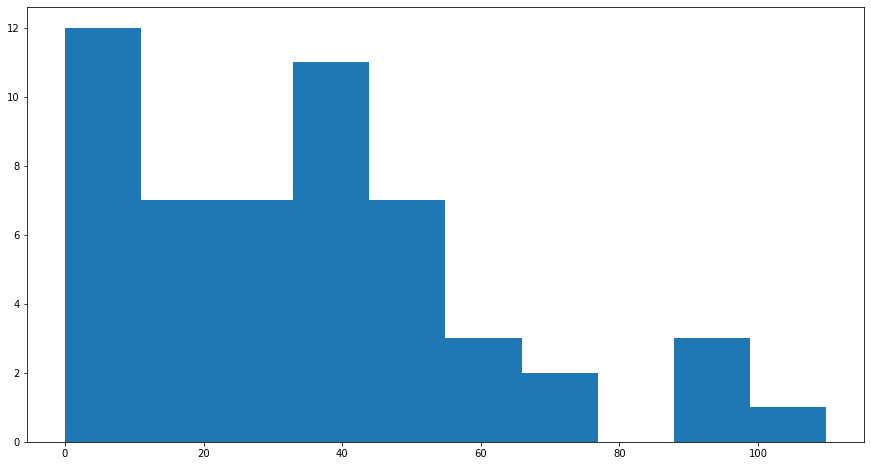

In [10]:
print('média = ', bd['Maxima'].mean())
plt.figure(figsize=(15, 8))
plt.hist(bd['Maxima'])
#plt.grid()

#### Congonhas

média =  29.45140845070422


(array([222., 142., 156., 116.,  40.,  18.,  10.,   5.,   0.,   1.]),
 array([  0. ,  14.3,  28.6,  42.9,  57.2,  71.5,  85.8, 100.1, 114.4,
        128.7, 143. ]),
 <a list of 10 Patch objects>)

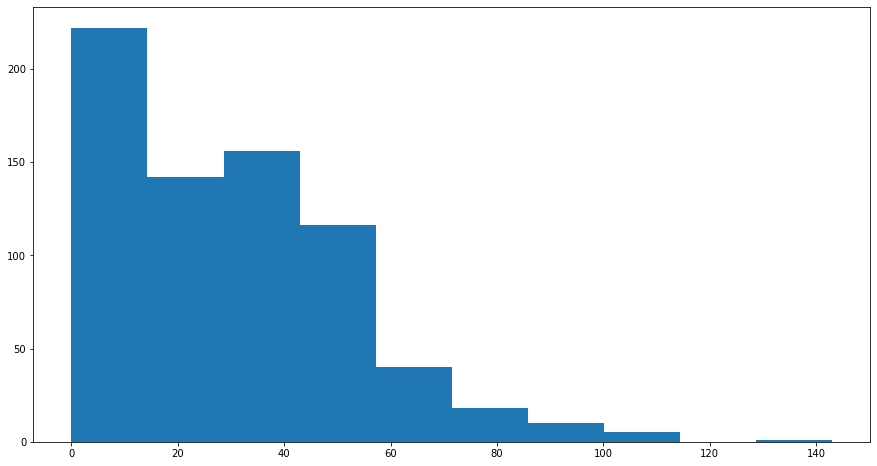

In [30]:
print('média = ', DB['Maxima'].mean())
plt.figure(figsize=(15, 8))
plt.hist(DB['Maxima'])
#plt.grid()

## Usando o seaborn
#### O seaborn é uma biblioteca que permite fazer gráficos melhores e mais bonitos que a matplotlib. Nesse caso, usando o 'distplot' o histograma recebe como envoltória a curva normal

#### Ouro Branco

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


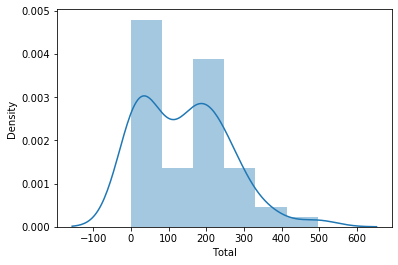

In [11]:
#plt.figure(figsize=(15, 8))
sns.distplot(bd.Total)

#### Congonhas

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


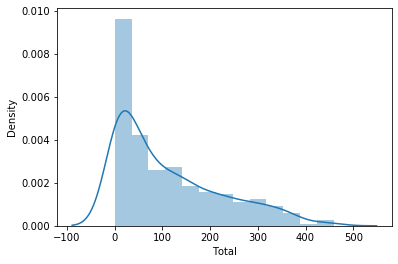

In [32]:
#plt.figure(figsize=(15, 8))
sns.distplot(DB.Total)

#### Usando o 'displot' o histograma recebe uma aparência mais amigável

#### Ouro Branco

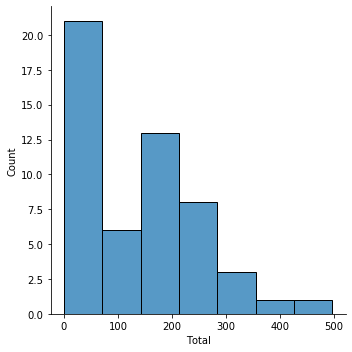

In [12]:
sns.displot(bd.Total)
#plt.figure(figsize=(15, 8))

#### Congonhas

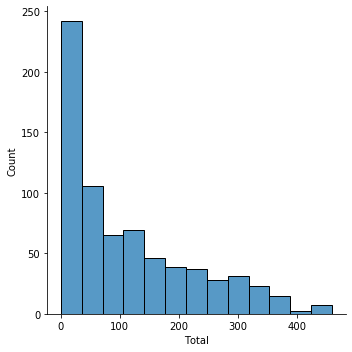

In [33]:
sns.displot(DB.Total)
#plt.figure(figsize=(15, 8))

## Desenhando Boxplot

#### Ouro Branco

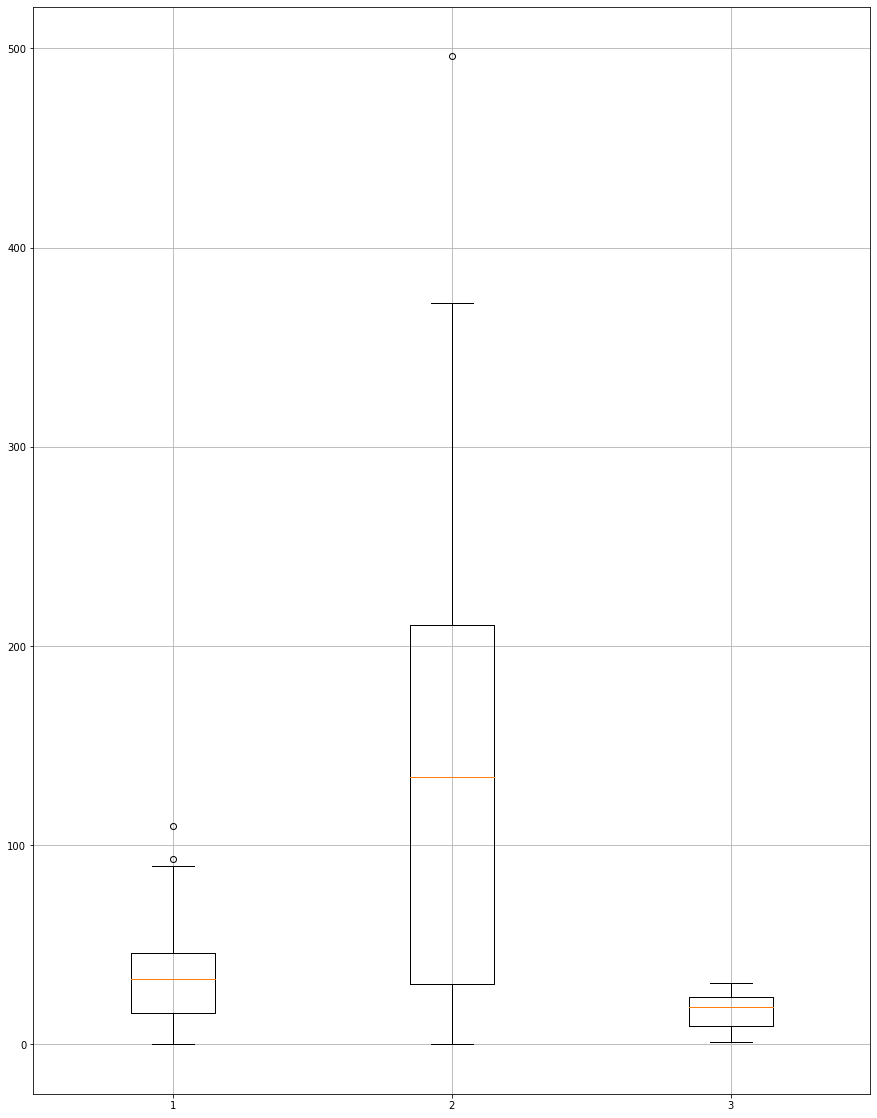

In [13]:
dados = [bd['Maxima'], bd['Total'], bd['DiaMaxima']]
plt.figure(figsize=(15,20))
plt.boxplot(dados, showfliers=True, vert=True); # vert=False
plt.grid()

### Congonhas

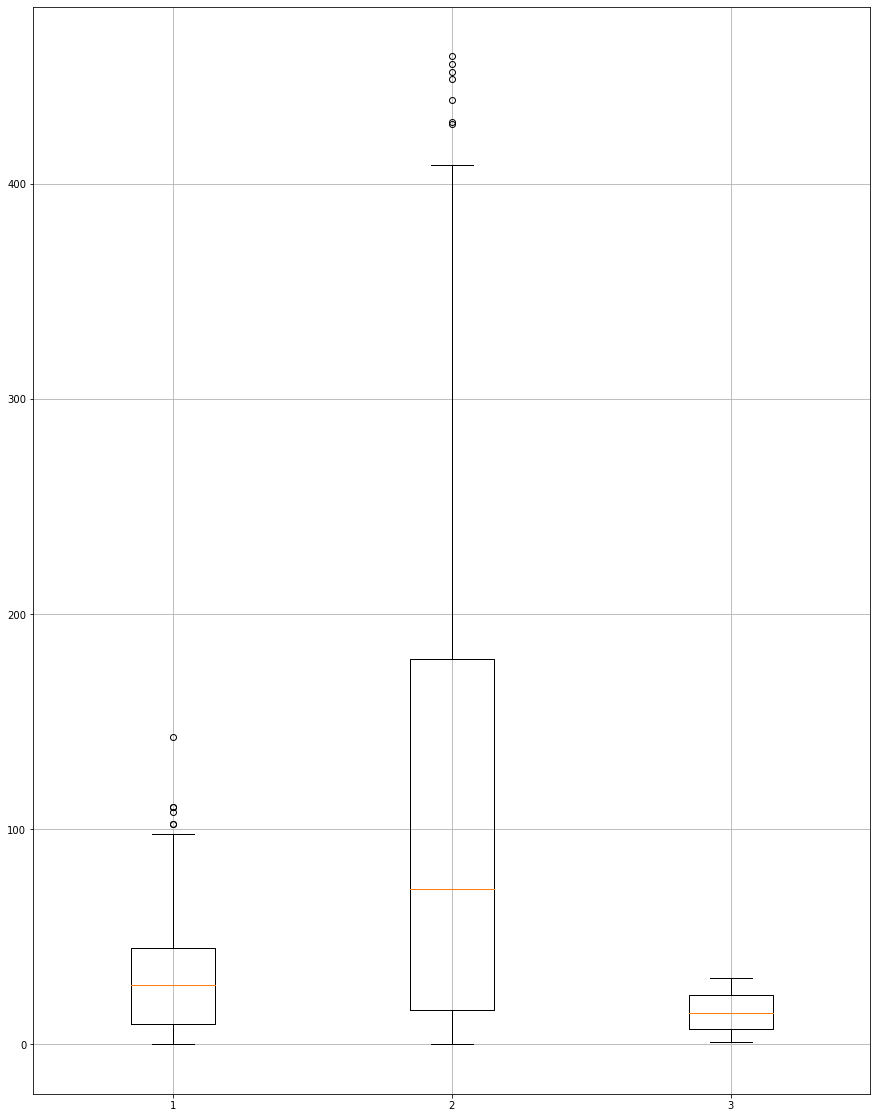

In [35]:
dados = [DB['Maxima'], DB['Total'], DB['DiaMaxima']]
plt.figure(figsize=(15,20))
plt.boxplot(dados, showfliers=True, vert=True); # vert=False
plt.grid()

## Agrupando os dados mensais em dados anuais

#### Ouro Branco

#### Transformando a data em datetime

In [14]:
bd['Data'] = pd.to_datetime(bd['Data'], dayfirst=True)
# o index baseado na data
bd = bd.set_index('Data')
#copia o indice para coluna
bd['Data'] = bd.index
# converte para um datetimeindex do tipo dia/mês/ano
bd['Data'] = bd['Data'].dt.strftime('%m/%d/%Y')
print(bd.head())

            NivelConsistencia  Maxima  Total  DiaMaxima        Data
Data                                                               
1978-09-01                  1    35.6   44.3        1.0  09/01/1978
1982-05-01                  1    19.4   21.6       26.0  05/01/1982
1983-05-01                  1    37.8   63.6       31.0  05/01/1983
1983-03-01                  1    88.4  220.2       20.0  03/01/1983
1992-09-01                  1    38.0  131.2       17.0  09/01/1992


#### Valores de máxima anuais

            NivelConsistencia  Maxima  Total  DiaMaxima        Data
Data                                                               
1978-12-31                1.0    67.7  295.2       30.0  12/01/1978
1979-12-31                NaN     NaN    NaN        NaN         NaN
1980-12-31                1.0    61.2  268.6       14.0  07/01/1980
1981-12-31                NaN     NaN    NaN        NaN         NaN
1982-12-31                1.0    19.4   21.6       26.0  08/01/1982


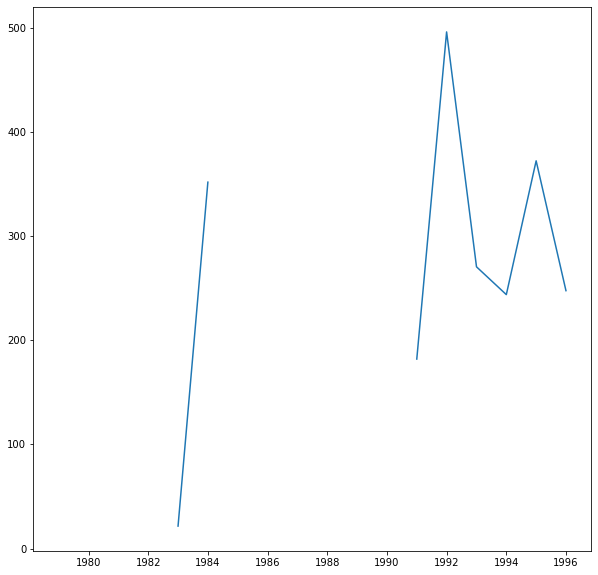

In [15]:
bdanual = bd.resample('Y').max()
print(bdanual.head())
plt.figure(figsize=(10, 10))
plt.plot(bdanual["Total"]);

#### Valores de máxima anuais filtrados

            NivelConsistencia  Maxima  Total  DiaMaxima        Data
Data                                                               
1978-12-31                1.0    67.7  295.2       30.0  12/01/1978
1980-12-31                1.0    61.2  268.6       14.0  07/01/1980
1982-12-31                1.0    19.4   21.6       26.0  08/01/1982
1983-12-31                1.0    89.6  351.9       31.0  12/01/1983
1990-12-31                1.0    49.0  182.0       28.0  12/01/1990


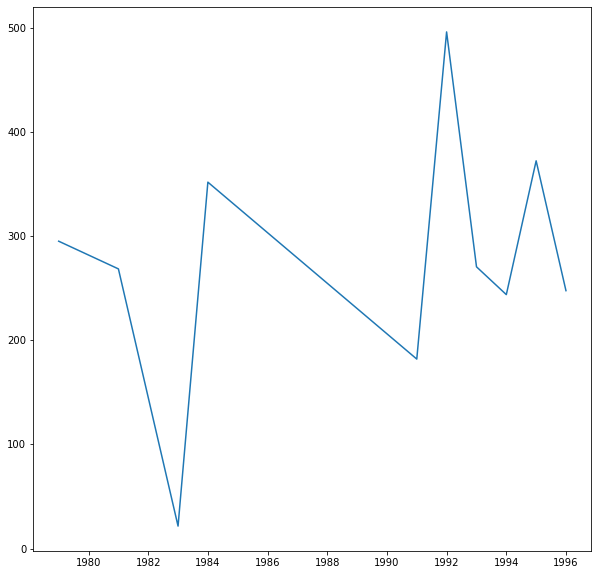

In [24]:
bdanual.dropna(axis=0, how='any',inplace=True) #retira os NaN
print(bdanual.head())

plt.figure(figsize=(10, 10))
plt.plot(bdanual["Total"]);

#### Congonhas

            NivelConsistencia  Maxima  Total  DiaMaxima        Data
Data                                                               
1941-12-31                  2    42.4  243.6       30.0  12/01/1941
1942-12-31                  2    51.6  339.5       24.0  12/01/1942
1943-12-31                  2    90.2  309.8       27.0  12/01/1943
1944-12-31                  2    45.6  278.6       25.0  12/01/1944
1945-12-31                  2    47.0  347.2       30.0  12/01/1945


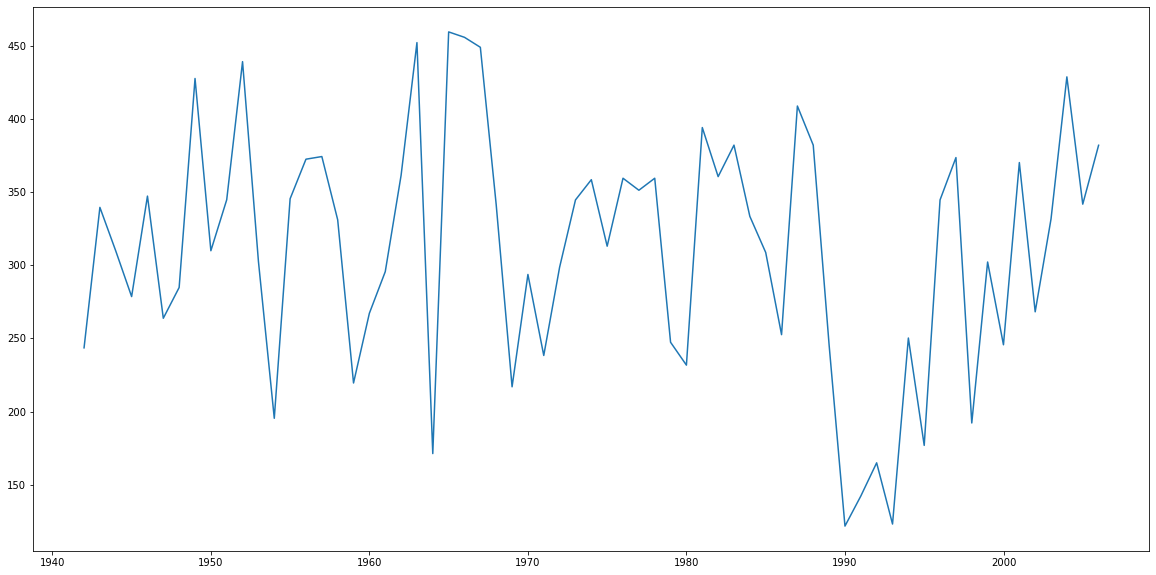

In [36]:
DBanual = DB.resample('Y').max()
print(DBanual.head())
plt.figure(figsize=(20, 10))
plt.plot(DBanual["Total"]);